In [ ]:
import os
import sys
from pathlib import Path
PROJECT_ROOT = Path.cwd().parents[0] 
sys.path.append(str(PROJECT_ROOT))
DATA_DIR = PROJECT_ROOT / "data"
RAW_DIR = DATA_DIR / "raw"
CLEAN_DIR = DATA_DIR / "clean"
ENRICHED_DIR = DATA_DIR / "enriched"

In [ ]:
from src.data_enrichment import get_features
df_feats, feature_cols = get_features(RAW_DIR)
df_feats = df_feats[(df_feats['season_end_year'] != 2025) & (df_feats['season_end_year'] != 2026)]


/workspaces/Machine-learning/Data_Enrichment.py:300: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["ballon_dor_winner"] = df["ballon_dor_winner"].fillna(False).astype(bool)


In [2]:

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt

In [3]:
# %% 2. Selección de features relevantes
selected_features = [
    'a_per90_z_lag1', 'matches_played_z_lag1', 'ga_per90_z_lag1',
    'pen_share_z_lag1', 'g_per90_z_lag1', 'g_per90_z_delta',
    'a_per90_w', 'ga_per90_z_delta', 'ga_per90_w', 'g_per90_w',
    'a_per90_z_delta', 'pen_share_w', 'minutes_played_z_delta',
    'minutes_played_z_lag1', 'pen_share_z_delta',
    'main_position', 'age', 'discipline_rate_z_lag1',
    'position'
]


In [4]:
# %% 3. Tomar una muestra aleatoria (para no explotar memoria)
sample_df = df_feats[selected_features].fillna(0).sample(1000, random_state=42)

In [ ]:
# %% 4. One-hot encode columnas categóricas
sample_df = pd.get_dummies(sample_df, columns=['main_position','position'], drop_first=True)

In [6]:
# %% 5. Escalar features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(sample_df)

In [7]:
# %% 6. Linkage jerárquico
Z = linkage(X_scaled, method='ward')

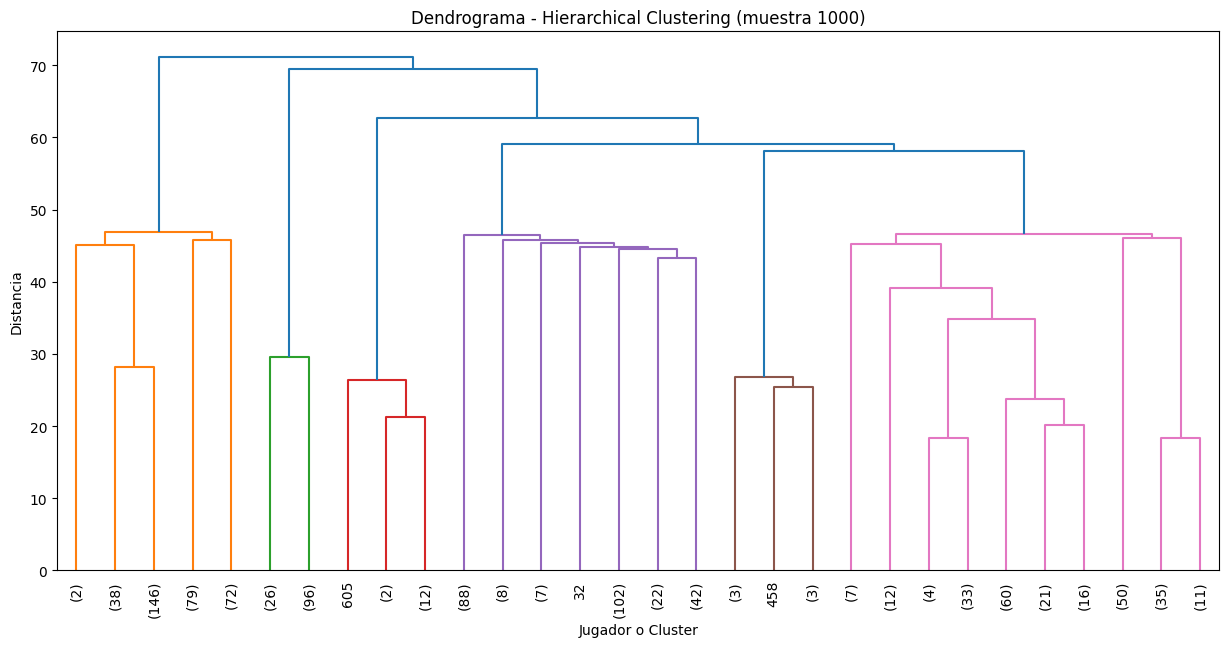

In [8]:
# %% 7. Dendrograma
plt.figure(figsize=(15, 7))
dendrogram(
    Z,
    leaf_rotation=90.,
    leaf_font_size=10.,
    truncate_mode='lastp',
    p=30
)
plt.title('Dendrograma - Hierarchical Clustering (muestra 1000)')
plt.xlabel('Jugador o Cluster')
plt.ylabel('Distancia')
plt.show()


In [9]:
# %% 8. Asignar clusters (por ejemplo 4)
clusters = fcluster(Z, t=4, criterion='maxclust')
sample_df['hier_cluster'] = clusters

In [10]:

# %% 9. Revisar promedios por cluster
cluster_summary = sample_df.groupby('hier_cluster').mean()
print(cluster_summary)


              a_per90_z_lag1  matches_played_z_lag1  ga_per90_z_lag1  \
hier_cluster                                                           
1                  -0.136043               0.142941        -0.139556   
2                  -0.156731              -0.215445        -0.158409   
3                   3.101540               0.740908         3.780757   
4                   0.139314               0.217878         0.110427   

              pen_share_z_lag1  g_per90_z_lag1  g_per90_z_delta  a_per90_w  \
hier_cluster                                                                 
1                    -0.155277       -0.131201         0.007771   0.002277   
2                    -0.144269       -0.147361         0.004394   0.001588   
3                     0.704969        3.775736        -2.690627  -0.196275   
4                     0.125957        0.092433         0.041885  -0.009187   

              ga_per90_z_delta  ga_per90_w  g_per90_w  ...  \
hier_cluster                        